<a href="https://colab.research.google.com/github/anasshaddad/DetectionDeplacementDiapasonaQuartz/blob/main/DiapasonQuartz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import files
data_to_load = files.upload()




Saving TPdiapason.rar to TPdiapason (1).rar


KeyboardInterrupt: ignored

In [ ]:
!pip install Cupy

     |████████████████████████████████| 5.9MB 4.2MB/s 
ERROR: Operation cancelled by user


In [ ]:
!pip install patool

     |████████████████████████████████| 81kB 3.8MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("TPdiapason.rar", outdir=".")


patool: Extracting TPdiapason.rar ...
patool: running /usr/bin/unrar x -- /content/TPdiapason.rar
patool:     with cwd='.'
patool: ... TPdiapason.rar extracted to `.'.


'.'

In [ ]:
!ls TPdiapason

32728.avi  32732.avi  32736.avi  32740.avi  32744.avi  32748.avi  32752.avi
32729.avi  32733.avi  32737.avi  32741.avi  32745.avi  32749.avi  32753.avi
32730.avi  32734.avi  32738.avi  32742.avi  32746.avi  32750.avi
32731.avi  32735.avi  32739.avi  32743.avi  32747.avi  32751.avi


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


le Frame :1
le Frame :2
le Frame :3
le Frame :4
le Frame :5
le Frame :6
le Frame :7
le Frame :8
le Frame :9
le Frame :10
le Frame :11
le Frame :12
le Frame :13
le Frame :14
le Frame :15
le Frame :16
le Frame :17
le Frame :18
le Frame :19
le Frame :20
le Frame :21
le Frame :22
le Frame :23
le Frame :24
le Frame :25
le Frame :26
le Frame :27
le Frame :28
1
le Frame :29
2
le Frame :30
3
le Frame :31
4
le Frame :32
5
le Frame :33
6
le Frame :34
7
le Frame :35
[[[  0.          0.          0.        ...   0.          0.
     0.       ]
  [289.9941349 289.9941349 289.9941349 ... 293.        293.
   293.       ]]

 [[  0.          0.          0.        ...   0.          0.
     0.       ]
  [289.9941349 289.9941349 289.9941349 ... 293.        293.
   293.       ]]

 [[  0.          0.          0.        ...   0.          0.
     0.       ]
  [289.9941349 289.9941349 289.9941349 ... 293.        293.
   293.       ]]

 ...

 [[  0.          0.          0.        ...   0.          0.
     0.     

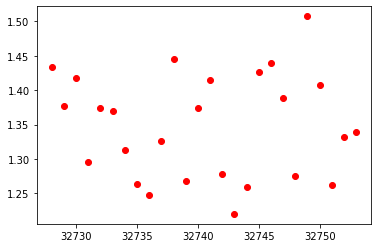

In [ ]:

import glob
import cv2
from PIL import Image
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


def Matrictolist(b):
    ligne=b.shape[0]
    column = b.shape[1]
    liste=[]
    for i in range(0,column):
      for j in range(0,ligne):
        liste.append(b[j][i])
    return (liste)
def Parcourirlist(A,listea):
    ligne=A.shape[0]
    
    liste=[]
    for i in range(0,ligne):
        liste.append(listea[A[i]-1])
    A=np.asarray(liste)
    return(A)
def MaxindiceCorr(M):
    liste=[]
   
    listeindex=[]
    ligne=M.shape[0]
    column = M.shape[1]
    
    for i in range(0,column):
      for j in range(0,ligne):
        liste.append(M[j][i])
       
     
      
        index=liste.index(max(liste))+1
     
      
      listeindex.append(index)
      liste=[]
    listeindex=np.asarray(listeindex)
    return(listeindex)
Frequence=np.arange(32728,32754,1)

path ="./TPdiapason/*.avi"
dirs = glob.glob(path)# les paths des videos a parcourir
p=0#indice des films
while p<len(dirs):
 
 ListeFilm = []
 cap = cv2.VideoCapture(dirs[p])
 i=0#indices des Frames
# Check if camera opened successfully
 if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
 while(cap.isOpened()):
  # Capture frame-by-frame
  if(i==35):
    break
  ret, image = cap.read()
  if ret == True:
    
    
        
    im = Image.fromarray(image)#numpy tp PIL IMage
    
    
    image1=im.crop((350,300,640,480))  #crop image pour garder la tete
    im1=np.array(image1)#Pil Image to numpy
    im3=im1[:,:,1]# 3D image to 2D
    if(i==27):
        reference=im3-np.mean(im3)
        m=1
    if(i>27):
        mesure = im3-np.mean(im3)
        cor = signal.correlate2d (reference,mesure,mode='full')
        
        
        A=MaxindiceCorr(cor)
        Amin=A-2
        Amax=A+3
        H=np.arange(Amin[0],Amax[0]+1)
        corliste=Matrictolist(cor)
        I=Parcourirlist(H,corliste)
        u=np.polyfit(H,I,2)
        xi=np.linspace(Amin,Amax,1024)
        yi=np.polyval(u,xi)
        B=MaxindiceCorr((yi))
        xiliste=Matrictolist(xi)
        Solution=Parcourirlist(B,xiliste)
        Shape=Solution.shape[0]
        
        
        ListeFilm.append(Solution)
        

        
    
        print(len(ListeFilm))
    i=i+1
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
    
  # Break the loop
  else: 
    break
  print("le Frame :{}".format(i))

# When everything done, release the video capture object
 cap.release()

# Closes all the frames
 cv2.destroyAllWindows()
 
 Arra = np.asarray(np.asarray(ListeFilm))
 Arra=Arra.reshape(i-28,1,-1)

 if(p==0):
         SolutionG=np.zeros((i-28,1,Shape))
 SolutionG=np.append(SolutionG,Arra,axis=1)
 
 print("{},{}".format(SolutionG,SolutionG.shape))

 p+=1
 print('le film :{}'.format(p))
SolutionG=np.delete(SolutionG,0,1)
Amplitude=[]
for l in range(0,p):
    X=np.std(SolutionG[:,l])
    Amplitude.append(X)
Amplitude = np.asarray(Amplitude)
plt.plot(Frequence,Amplitude,'ro')

cap.release()

# Closes all the frames
cv2.destroyAllWindows()
    


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install patool

     |████████████████████████████████| 81kB 4.6MB/s 
